# Adult Census Price Prediction

In this project we are going to see the price prediction of peoples based on their living categories..

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educationnum,maritalstatus,Occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,Occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.tail()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,Occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationnum',
       'maritalstatus', 'Occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'country', 'salary'],
      dtype='object')

In [7]:
df.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
educationnum     0
maritalstatus    0
Occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
country          0
salary           0
dtype: int64

In [9]:
## df.isnull().sum() = there is no null values so no need to do imputation..

In [10]:
df.describe()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
## there is no duplicate values...
df.duplicated().sum()

24

In [12]:
df.drop_duplicates(keep=False,inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
## There is no more duplicated values so no need for any data collapsing..and excess data

In [15]:
df.corr()

C:\Users\Purushoth\AppData\Local\Temp\ipykernel_3884\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
age,1.000000,-0.076249,0.036010,0.077681,0.057722,0.068273
fnlwgt,-0.076249,1.000000,-0.043582,0.000425,-0.010269,-0.019028
educationnum,0.036010,-0.043582,1.000000,0.122693,0.079870,0.148703
capitalgain,0.077681,0.000425,0.122693,1.000000,-0.031662,0.078407
capitalloss,0.057722,-0.010269,0.079870,-0.031662,1.000000,0.054202
hoursperweek,0.068273,-0.019028,0.148703,0.078407,0.054202,1.000000


C:\Users\Purushoth\AppData\Local\Temp\ipykernel_3884\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

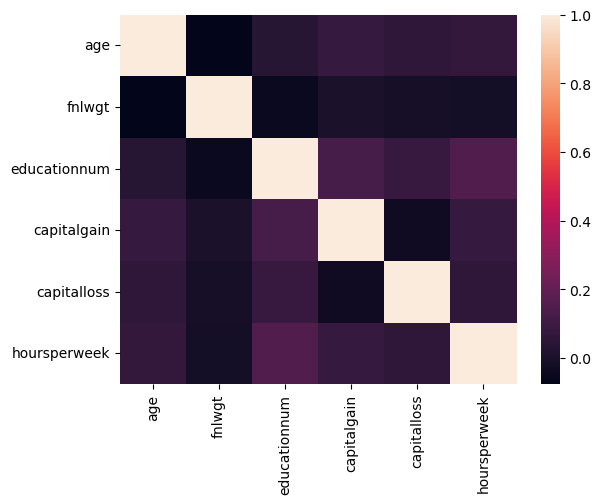

In [16]:
sns.heatmap(df.corr())

Consider age column that age only have less effects on other features like 
1. education-num
2. capital-gain
3. capital-loss
4. hours-per-week

In [17]:
## splitting independent and dependent features 
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,Occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [18]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: salary, dtype: object

In [19]:
x

,age,workclass,fnlwgt,education,educationnum,maritalstatus,Occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


C:\Users\Purushoth\AppData\Local\Temp\ipykernel_3884\2179091525.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.pairplot(df.corr())


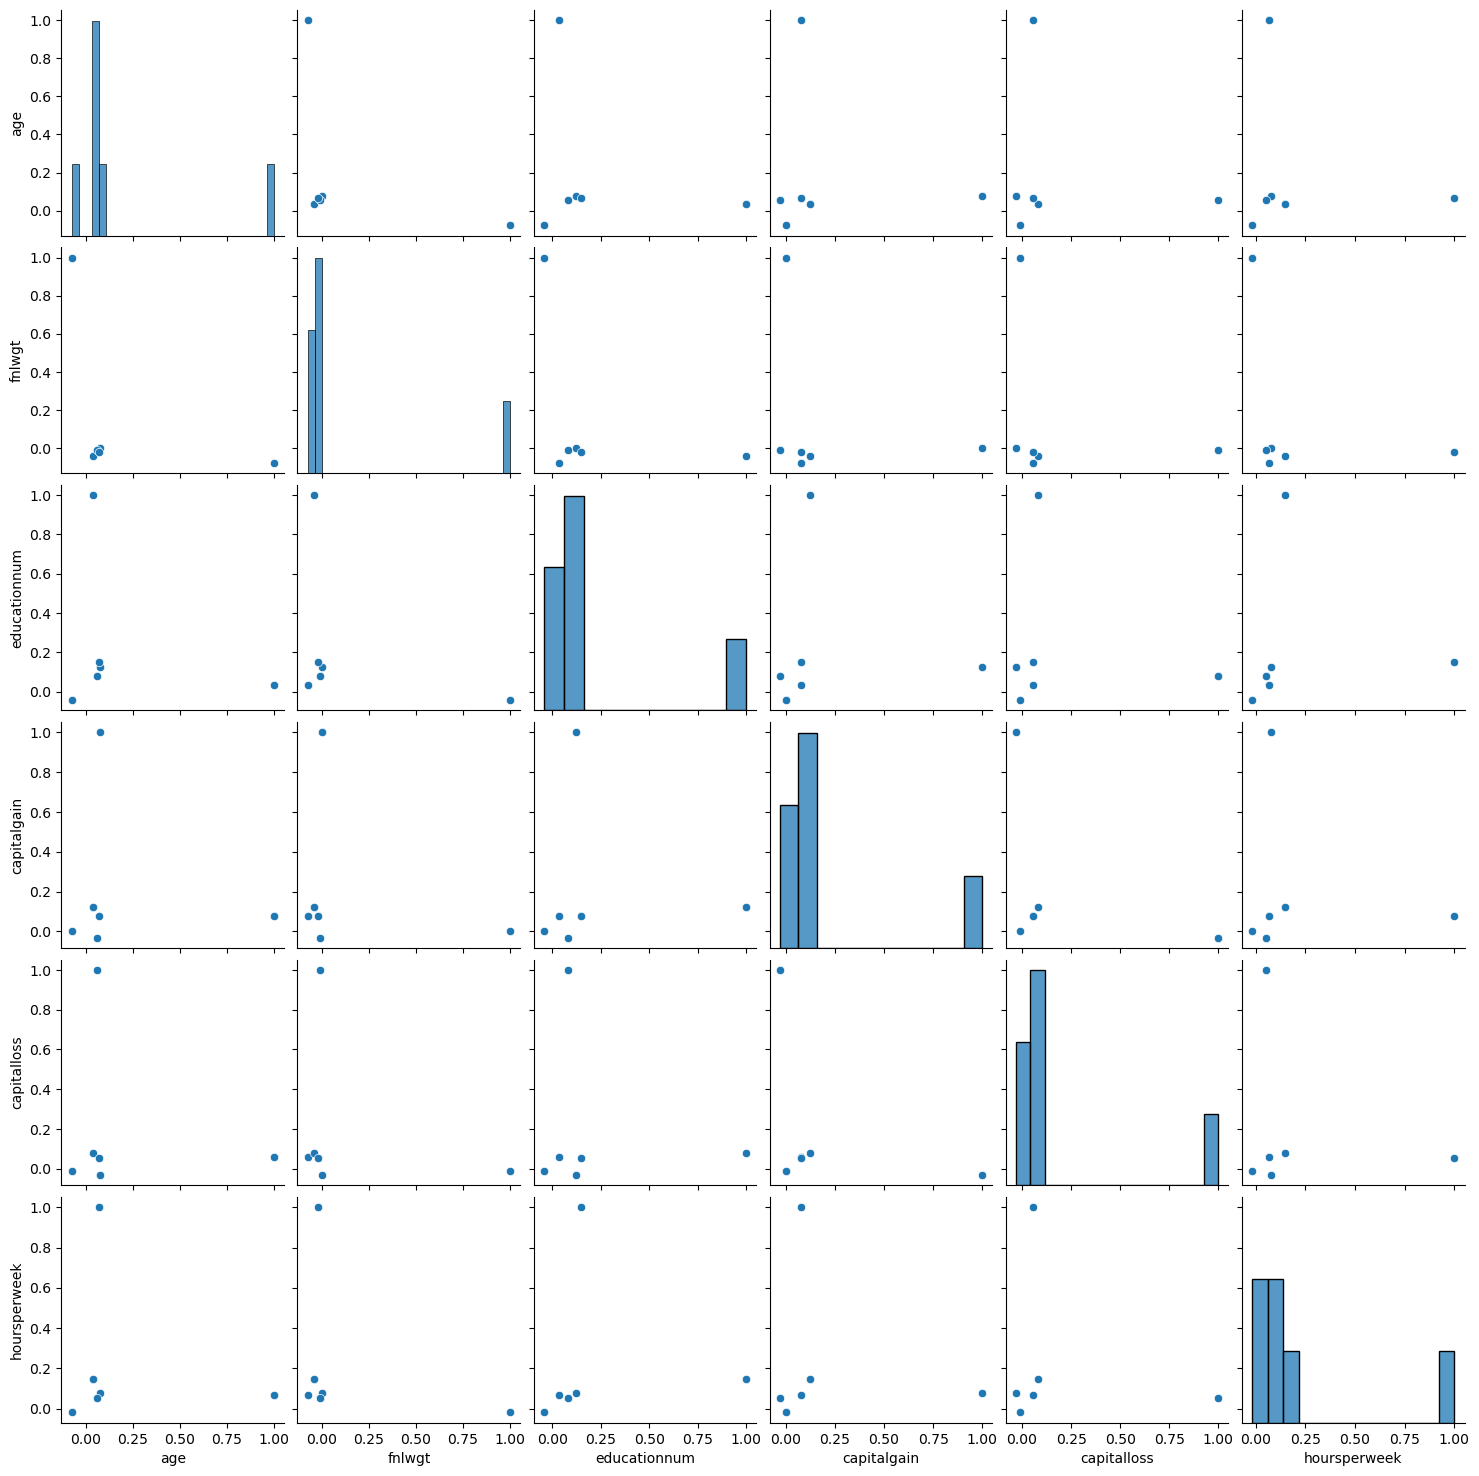

In [20]:
sns.pairplot(df.corr())

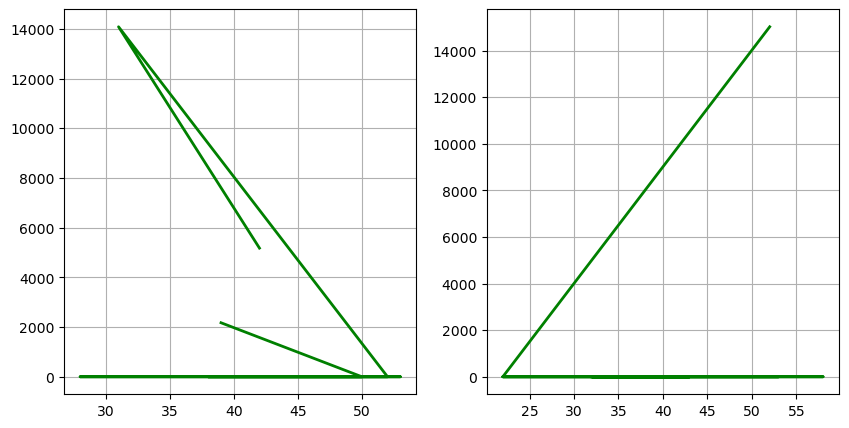

In [22]:
fig,axes=plt.subplots(1,2,figsize=(10,5),dpi=100)
age = df['age'].head(10)
cp_gain = df['capitalgain'].head(10)
axes[0].plot(age,cp_gain,"g",lw=2)
axes[0].grid(True)
age1 = df['age'].tail(10)
cp_gain1 = df['capitalgain'].tail(10)
axes[1].plot(age1,cp_gain1,"g",lw=2)
axes[1].grid(True)

In [23]:
## sampling..
df.size

487710

In [24]:
## Extracting the 25 percent of data as a sample..
sampled_df = df.sample(frac=0.25, random_state=42)
# Optionally, you can reset the index of the sampled dataframe
sampled_df.reset_index(drop=True, inplace=True)

In [25]:
sampled_df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,Occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country,salary
0,43,Self-emp-not-inc,336763,Some-college,10,Divorced,Sales,Unmarried,White,Female,0,880,42,United-States,<=50K
1,31,Private,171871,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,46,United-States,<=50K
2,44,State-gov,180609,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
3,42,Self-emp-inc,50122,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K
4,26,State-gov,152457,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ' Never-married'),
  Text(1, 0, ' Married-civ-spouse'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Married-spouse-absent'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse')])

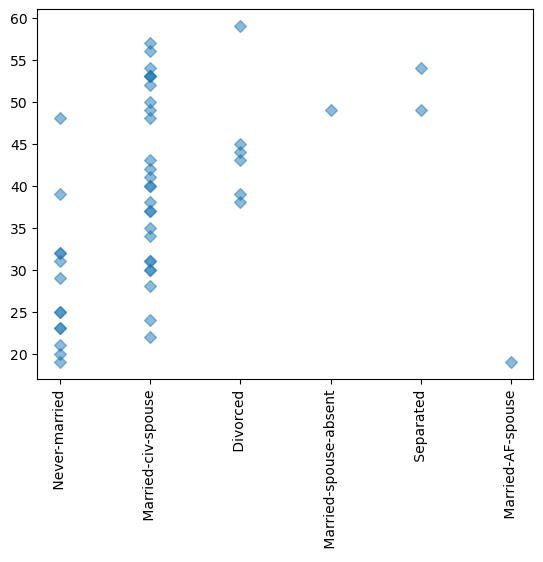

In [26]:
## age vs marital status..for 50 persons 
x= df['maritalstatus'].head(50)
y= df['age'].head(50)
plt.scatter(x,y,marker='D', alpha=0.5)
plt.xticks(rotation='vertical')

Text(0, 0.5, 'capital-gain')

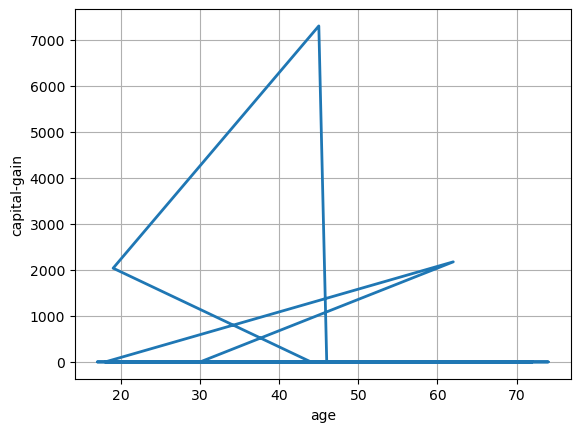

In [27]:
age = sampled_df['age'].head(50)
cp_gain = sampled_df['capitalgain'].head(50)
plt.plot(age,cp_gain,lw=2)
plt.grid(True)
plt.xlabel('age')
plt.ylabel('capital-gain')

In [28]:
## The highest captial gain is occured for the persons whose age is in-between 40-50 age..

Text(0, 0.5, 'capital-loss')

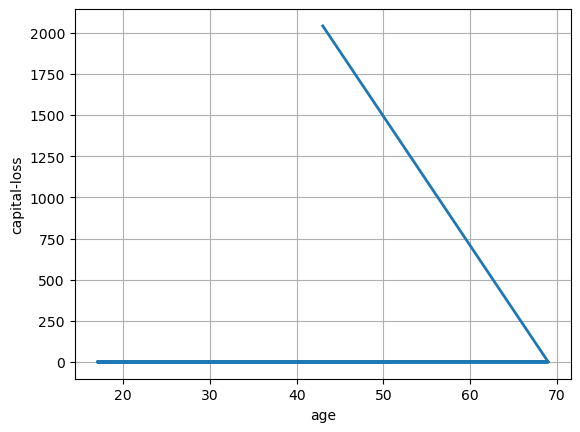

In [29]:
age1 = sampled_df['age'].tail(50)
cp_loss1 = sampled_df['capitalloss'].tail(50)
plt.plot(age1,cp_loss1,lw=2)
plt.grid(True)
plt.xlabel('age')
plt.ylabel('capital-loss')

In [30]:
### but at the same time highest captial loss also happened between the same 40-50 years..age category

In [31]:
df.head(40)

,age,workclass,fnlwgt,education,educationnum,maritalstatus,Occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England')])

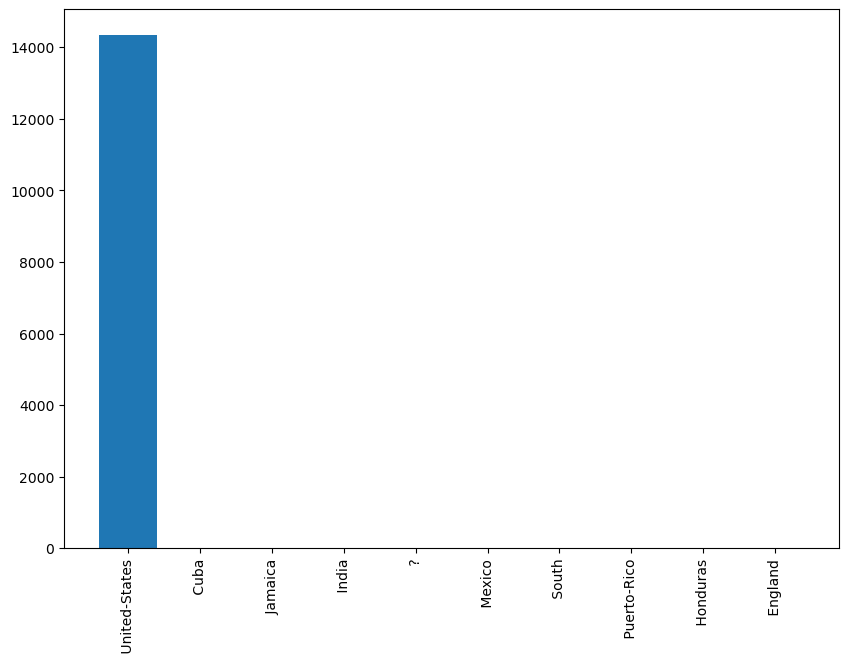

In [32]:
## country vs capital gain..
name = df['country'].head(100)
price = df['capitalgain'].head(100)
fig = plt.figure(figsize =(10, 7))
plt.bar(name,price)
plt.xticks(rotation='vertical')

In [33]:
### from overall the united states have highest captial gain as compared to other countries..

<Axes: xlabel='age', ylabel='Count'>

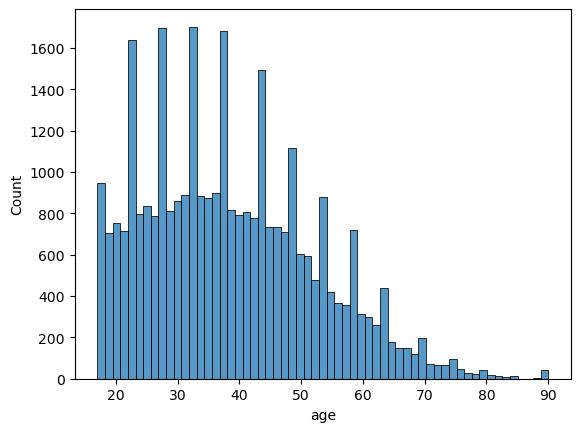

In [34]:
## age vs count..
sns.histplot(data=df,x='age')

In [35]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [36]:
X.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,Occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [37]:
Y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: salary, dtype: object

In [38]:
X.shape

(32514, 14)

In [39]:
Y.shape

(32514,)

In [40]:
### preprocessing..
X.corr()

C:\Users\Purushoth\AppData\Local\Temp\ipykernel_3884\413887721.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corr()


,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
age,1.000000,-0.076249,0.036010,0.077681,0.057722,0.068273
fnlwgt,-0.076249,1.000000,-0.043582,0.000425,-0.010269,-0.019028
educationnum,0.036010,-0.043582,1.000000,0.122693,0.079870,0.148703
capitalgain,0.077681,0.000425,0.122693,1.000000,-0.031662,0.078407
capitalloss,0.057722,-0.010269,0.079870,-0.031662,1.000000,0.054202
hoursperweek,0.068273,-0.019028,0.148703,0.078407,0.054202,1.000000


In [41]:
## from this education-num have high correlation with hours-per-week so just take one feature for purpose..
X.drop(columns='hoursperweek',inplace=True)

In [42]:
X.dtypes

age               int64
workclass        object
fnlwgt            int64
education        object
educationnum      int64
maritalstatus    object
Occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
country          object
dtype: object

In [43]:
numerical_columns = X.select_dtypes(exclude=['object'])
numerical_columns

,age,fnlwgt,educationnum,capitalgain,capitalloss
0,39,77516,13,2174,0
1,50,83311,13,0,0
2,38,215646,9,0,0
3,53,234721,7,0,0
4,28,338409,13,0,0
...,...,...,...,...,...
32556,27,257302,12,0,0
32557,40,154374,9,0,0
32558,58,151910,9,0,0
32559,22,201490,9,0,0


In [44]:
## ENCODING..
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [46]:
for column_name, dtype in X.dtypes.items():
    if dtype == 'object':
        unique_values = ', '.join(X[column_name].unique())
        print('{}: {}'.format(column_name, unique_values))

workclass:  State-gov,  Self-emp-not-inc,  Private,  Federal-gov,  Local-gov,  ?,  Self-emp-inc,  Without-pay,  Never-worked
education:  Bachelors,  HS-grad,  11th,  Masters,  9th,  Some-college,  Assoc-acdm,  Assoc-voc,  7th-8th,  Doctorate,  Prof-school,  5th-6th,  10th,  1st-4th,  Preschool,  12th
maritalstatus:  Never-married,  Married-civ-spouse,  Divorced,  Married-spouse-absent,  Separated,  Married-AF-spouse,  Widowed
Occupation:  Adm-clerical,  Exec-managerial,  Handlers-cleaners,  Prof-specialty,  Other-service,  Sales,  Craft-repair,  Transport-moving,  Farming-fishing,  Machine-op-inspct,  Tech-support,  ?,  Protective-serv,  Armed-Forces,  Priv-house-serv
relationship:  Not-in-family,  Husband,  Wife,  Own-child,  Unmarried,  Other-relative
race:  White,  Black,  Asian-Pac-Islander,  Amer-Indian-Eskimo,  Other
sex:  Male,  Female
country:  United-States,  Cuba,  Jamaica,  India,  ?,  Mexico,  South,  Puerto-Rico,  Honduras,  England,  Canada,  Germany,  Iran,  Philippines,

In [47]:
encoded_x = ohe.fit_transform(X[['workclass','education','maritalstatus','Occupation','relationship','race','sex','country']]).toarray()

In [48]:
encoded_x.shape

(32514, 102)

In [49]:
ohe.categories_

[array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
       dtype=object),
 array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object),
 array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
        ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
        ' Transport-moving'], dtype=object),
 array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
        ' Unmarried'

In [50]:
feature_labels = ohe.categories_

In [51]:
## .ravel() used to change 2 dimensional array to flattened multi dimensional array
feature_labels = np.array(feature_labels).ravel()

C:\Users\Purushoth\AppData\Local\Temp\ipykernel_3884\4081788744.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  feature_labels = np.array(feature_labels).ravel()


In [52]:
all_values = [label for labels in feature_labels for label in labels]
print(all_values)

[' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay', ' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college', ' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed', ' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service', ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving', ' Husband', ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried', ' Wife', ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White', ' Female', ' Male', ' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecua

In [53]:
categorical_encoded = pd.DataFrame(encoded_x,columns=all_values)
categorical_encoded

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32509,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32510,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32512,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
## standardization..
numerical_columns.head()

,age,fnlwgt,educationnum,capitalgain,capitalloss
0,39,77516,13,2174,0
1,50,83311,13,0,0
2,38,215646,9,0,0
3,53,234721,7,0,0
4,28,338409,13,0,0


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_columns)

In [56]:
X_scaled

array([[ 0.03013948, -1.063545  ,  1.13475762,  0.14813721, -0.21682342],
       [ 0.836868  , -1.00864717,  1.13475762, -0.14602816, -0.21682342],
       [-0.04319947,  0.24500322, -0.42114506, -0.14602816, -0.21682342],
       ...,
       [ 1.42357964, -0.35878762, -0.42114506, -0.14602816, -0.21682342],
       [-1.21662277,  0.11089906, -0.42114506, -0.14602816, -0.21682342],
       [ 0.98354591,  0.9297435 , -0.42114506,  1.88687919, -0.21682342]])

In [57]:
features =[]
for feature in numerical_columns.dtypes.items():
    features.append(feature[0])

In [58]:
numerical_standard = pd.DataFrame(X_scaled,columns=features)
numerical_standard

,age,fnlwgt,educationnum,capitalgain,capitalloss
0,0.030139,-1.063545,1.134758,0.148137,-0.216823
1,0.836868,-1.008647,1.134758,-0.146028,-0.216823
2,-0.043199,0.245003,-0.421145,-0.146028,-0.216823
3,1.056885,0.425707,-1.199096,-0.146028,-0.216823
4,-0.776589,1.407975,1.134758,-0.146028,-0.216823
...,...,...,...,...,...
32509,-0.849928,0.639623,0.745782,-0.146028,-0.216823
32510,0.103478,-0.335445,-0.421145,-0.146028,-0.216823
32511,1.423580,-0.358788,-0.421145,-0.146028,-0.216823
32512,-1.216623,0.110899,-0.421145,-0.146028,-0.216823


In [60]:
categorical_encoded['age'] = numerical_standard['age']
categorical_encoded['fnlwgt'] = numerical_standard['fnlwgt']
categorical_encoded['educationnum'] = numerical_standard['educationnum']
categorical_encoded['capitalgain'] = numerical_standard['capitalgain']
categorical_encoded['capitalloss'] = numerical_standard['capitalloss']
categorical_encoded

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,...,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,age,fnlwgt,educationnum,capitalgain,capitalloss
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.030139,-1.063545,1.134758,0.148137,-0.216823
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.836868,-1.008647,1.134758,-0.146028,-0.216823
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.043199,0.245003,-0.421145,-0.146028,-0.216823
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.056885,0.425707,-1.199096,-0.146028,-0.216823
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.776589,1.407975,1.134758,-0.146028,-0.216823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32509,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.849928,0.639623,0.745782,-0.146028,-0.216823
32510,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.103478,-0.335445,-0.421145,-0.146028,-0.216823
32511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.423580,-0.358788,-0.421145,-0.146028,-0.216823
32512,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-1.216623,0.110899,-0.421145,-0.146028,-0.216823


In [61]:
col =categorical_encoded.pop("age")
categorical_encoded.insert(0,col.name,col)

In [62]:
categorical_encoded

,age,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,...,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,fnlwgt,educationnum,capitalgain,capitalloss
0,0.030139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.063545,1.134758,0.148137,-0.216823
1,0.836868,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.008647,1.134758,-0.146028,-0.216823
2,-0.043199,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.245003,-0.421145,-0.146028,-0.216823
3,1.056885,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.425707,-1.199096,-0.146028,-0.216823
4,-0.776589,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.407975,1.134758,-0.146028,-0.216823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32509,-0.849928,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.639623,0.745782,-0.146028,-0.216823
32510,0.103478,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.335445,-0.421145,-0.146028,-0.216823
32511,1.423580,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.358788,-0.421145,-0.146028,-0.216823
32512,-1.216623,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.110899,-0.421145,-0.146028,-0.216823


In [63]:
Y.unique
## The depedent feature only have 2 category of features so no need for encoding..

<bound method Series.unique of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: salary, Length: 32514, dtype: object>

In [64]:
## This are the overall preprocessing techniques..done